In [2]:
import seaborn as sns
df = sns.load_dataset('titanic');

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


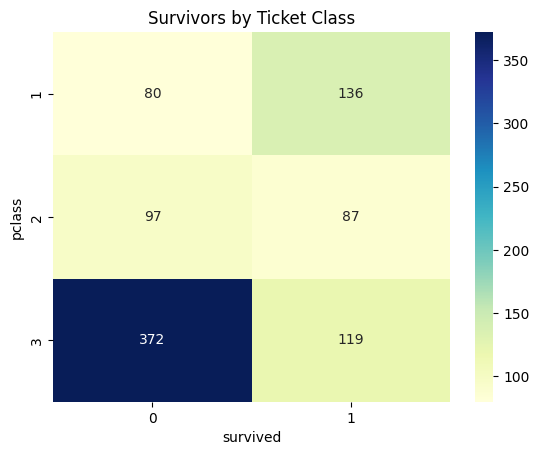

Ticket class with most survivors: 1


In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Cross tabulation to find the number of survivors by ticket class
survivors_by_class = pd.crosstab(df['pclass'], df['survived'])

# Heatmap visualization
sns.heatmap(survivors_by_class, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survivors by Ticket Class')
plt.show()

# Identify the ticket class with the most survivors
ticket_class_most_survivors = survivors_by_class[1].idxmax()
print("Ticket class with most survivors:", ticket_class_most_survivors)


In [5]:
# Convert parch and sibsp to categorical
df['parch'] = df['parch'].astype('category')
df['sibsp'] = df['sibsp'].astype('category')

# Filter survivors
survivors = df[df['survived'] == 1]

# Calculate percentages
percentage_parch_1 = (survivors['parch'].value_counts(normalize=True).get(1, 0)) * 100
percentage_sibsp_1 = (survivors['sibsp'].value_counts(normalize=True).get(1, 0)) * 100

print(f"Percentage of survivors with 1 parent/child: {percentage_parch_1:.2f}%")
print(f"Percentage of survivors with 1 sibling/spouse: {percentage_sibsp_1:.2f}%")


Percentage of survivors with 1 parent/child: 19.01%
Percentage of survivors with 1 sibling/spouse: 32.75%


<ipython-input-6-dd895cb754ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survivors['parch'] = survivors['parch'].astype('category')
<ipython-input-6-dd895cb754ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survivors['sibsp'] = survivors['sibsp'].astype('category')


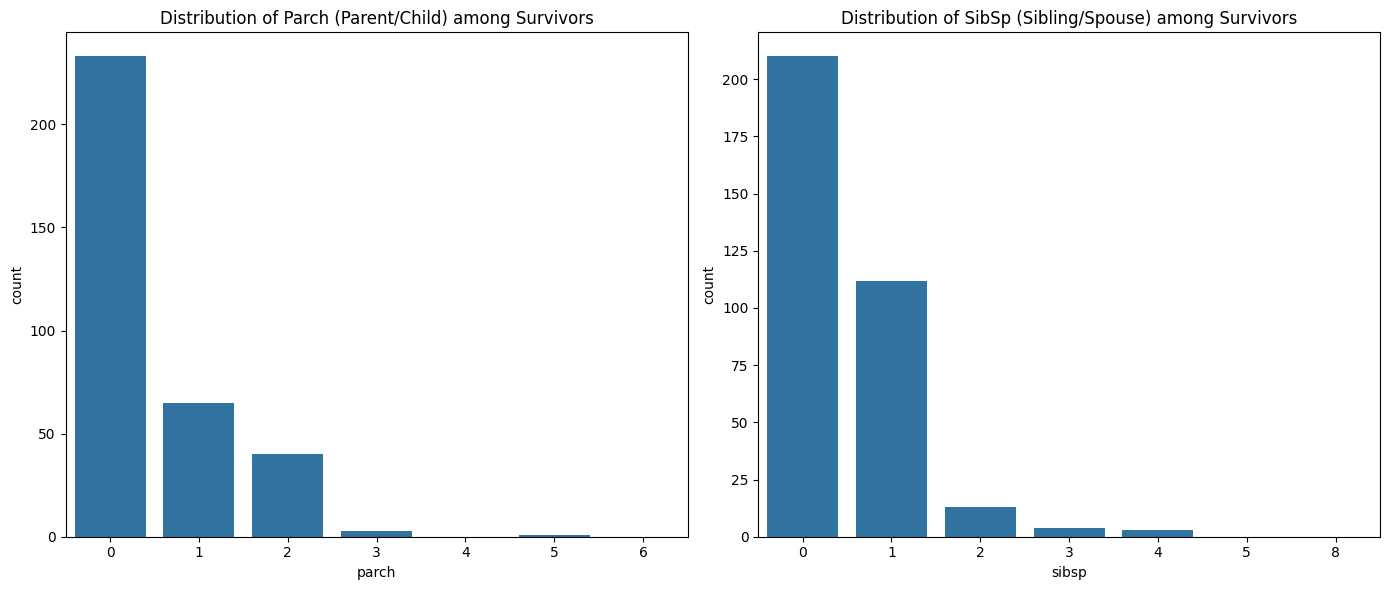

In [6]:


# Assuming df is already loaded as in the previous examples
# Filter survivors
survivors = df[df['survived'] == 1]

# Convert 'parch' and 'sibsp' to categorical for easy plotting
survivors['parch'] = survivors['parch'].astype('category')
survivors['sibsp'] = survivors['sibsp'].astype('category')

# Plot the distribution of 'parch' among survivors
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='parch', data=survivors)
plt.title('Distribution of Parch (Parent/Child) among Survivors')

# Plot the distribution of 'sibsp' among survivors
plt.subplot(1, 2, 2)
sns.countplot(x='sibsp', data=survivors)
plt.title('Distribution of SibSp (Sibling/Spouse) among Survivors')

plt.tight_layout()
plt.show()


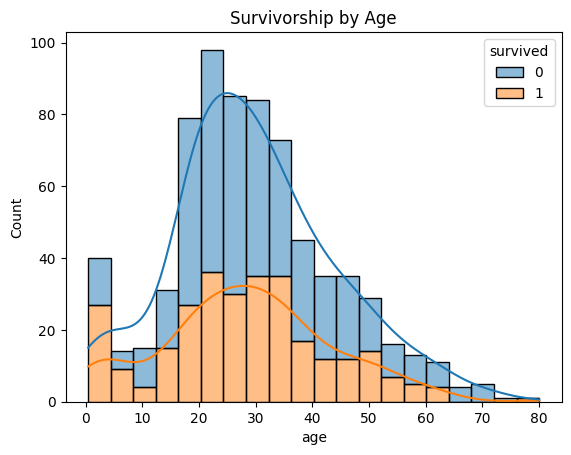

Pearson correlation between Age and Survival: -0.08


In [9]:
# Scatter plot of age vs survival
sns.histplot(data=df, x='age', hue='survived', multiple='stack', kde=True)
plt.title('Survivorship by Age')
plt.show()

# Interpretation
age_survival_corr = df['age'].corr(df['survived'])
print(f"Pearson correlation between Age and Survival: {age_survival_corr:.2f}")


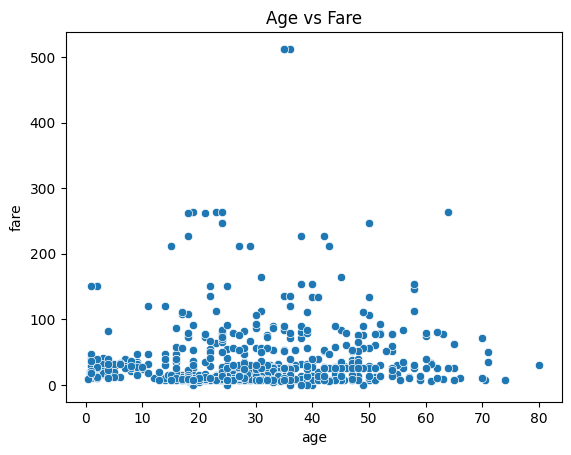

Pearson correlation coefficient between Age and Fare: 0.10


In [10]:
# Scatter plot of age vs fare
sns.scatterplot(x='age', y='fare', data=df)
plt.title('Age vs Fare')
plt.show()

# Calculate Pearson correlation
age_fare_corr = df['age'].corr(df['fare'])
print(f"Pearson correlation coefficient between Age and Fare: {age_fare_corr:.2f}")


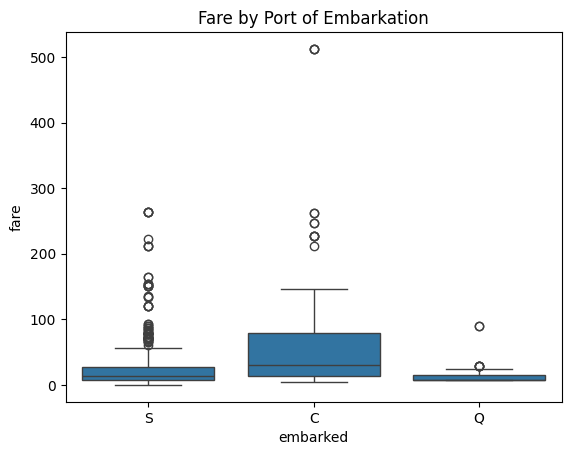

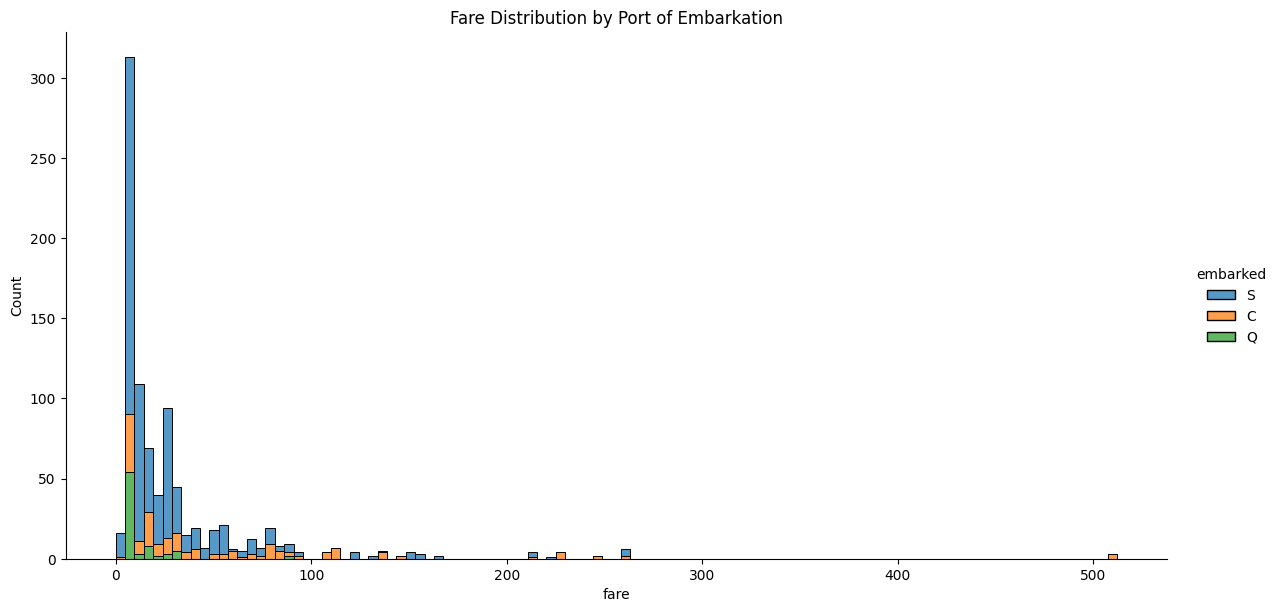

People who paid more than $500 embarked from: ['C']


In [11]:
# Box plot for fare by port of embarkation
sns.boxplot(x='embarked', y='fare', data=df)
plt.title('Fare by Port of Embarkation')
plt.show()

# Distribution plot for fare by port
sns.displot(df, x="fare", hue="embarked", multiple="stack", height=6, aspect=2)
plt.title('Fare Distribution by Port of Embarkation')
plt.show()

# Identify where people who paid more than $500 embarked from
high_fare_ports = df[df['fare'] > 500]['embarked'].unique()
print(f"People who paid more than $500 embarked from: {high_fare_ports}")
